In [31]:
import numpy as np
import pandas as pd
dados_completo = pd.read_csv('/home/ufms/Documentos/doutorado/mineracao-de-dados/adult.csv', encoding="utf-8-sig")

In [3]:
dados_completo.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
import squarify
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

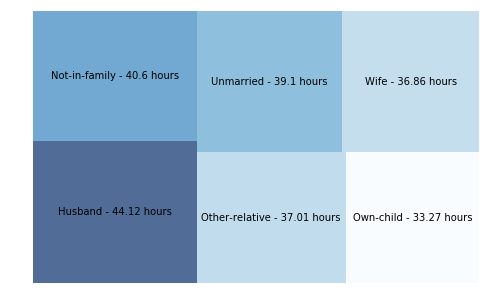

In [12]:
plt.figure(figsize=(8,5))
group_df=dados_completo.groupby(['relationship'])['hours-per-week'].mean().round(2)
team=group_df.index.get_level_values("relationship")
labels=np.array(team)+ " - " +group_df.astype("str")+" hours"

cmap = matplotlib.cm.Blues
mini=min(group_df)
maxi=max(group_df)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in group_df]

squarify.plot(sizes=group_df, label=labels, alpha=.7, color=colors)
plt.axis('off')
plt.savefig('relationship_hours_per_week.png')
plt.show()

relationship
Husband           43.82
Not-in-family     38.35
Other-relative    33.16
Own-child         24.83
Unmarried         40.29
Wife              39.85
Name: age, dtype: float64


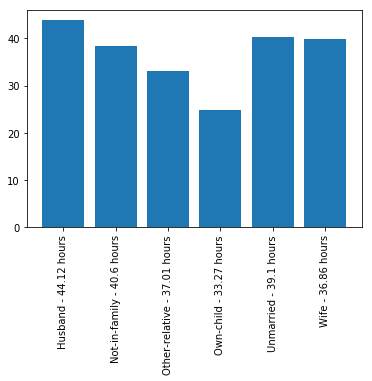

In [68]:
height = dados_completo.groupby(['relationship'])['age'].mean().round(2)
relationship=height.index.get_level_values("relationship")
bars = np.array(team)+ " - " +group_df.astype("str")+" hours"
y_pos = np.arange(len(bars))
print(height)
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
 
plt.savefig('relationship_hours_per_week_age.png')
# Show graphic
plt.show()

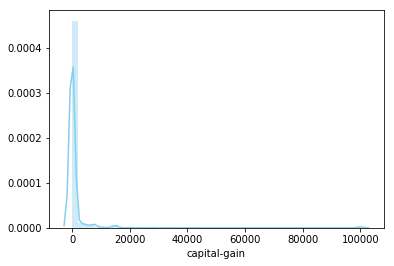

In [10]:
sns.distplot( dados_completo["capital-gain"] , color="skyblue", label="Capital gain")
#sns.distplot( dados_completo["class"] , color="red", label="Capital anual")
#plt.legend()
plt.savefig('histogram-capital-gain.png')

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  class  
0          2174             0              40  United-States  <=50K  
1             0             0             

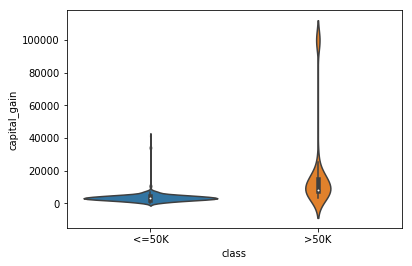

In [26]:
print(dados_completo.head())
df_temp = dados_completo.rename(columns={'capital-gain':'capital_gain'})
df_temp.drop(df_temp[df_temp.capital_gain == 0].index, inplace=True)
sns.violinplot( x=df_temp["class"], y=df_temp["capital_gain"])
plt.savefig('violin-capital-gain.png')
#sns.plt.show()

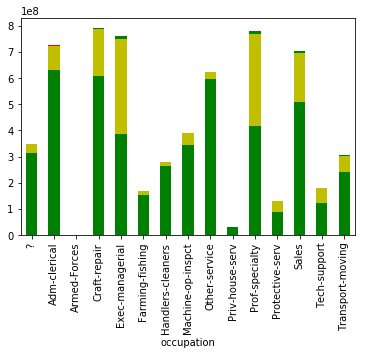

In [42]:
#df = dados_completo.pivot(columns='occupation',index='class')
#plot it
#df.plot(kind='bar',stacked=True,legend=True)
#plt.show()
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(dados_completo)))
df1=dados_completo.groupby(['occupation','class']).sum().unstack().fillna(0)
df1.plot(kind='bar',stacked=True,legend=False, color=my_colors)
plt.savefig('stacked-bar-occupaton-class.png')